<a href="https://colab.research.google.com/github/AndrewSmith44/MAT421/blob/main/Project_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Predicting real estate prices is a major topic of interest in both academic research and industry applications. Accurate price prediction models can support decision-making for buyers, sellers, real estate agents, and financial institutions. By understanding how various property characteristics influence sale prices, it is possible to make more informed investment and policy decisions.

In this project, I focus on modeling house prices in Arizona using real-world housing data collected from Zillow listings during 2021. The dataset includes features such as property size, number of bedrooms and bathrooms, local area, and zip code. My objective is to build predictive models that can estimate the sale price of a house based on these attributes.

I apply several numerical methods studied throughout the course, including Linear Regression, Random Forest Regression, and XGBoost Regression. Each method is chosen for its different strengths: Linear Regression provides a simple and interpretable baseline, Random Forest Regression offers flexibility and robustness to overfitting, and XGBoost Regression incorporates gradient boosting to potentially achieve higher predictive accuracy.

In addition to implementing these methods in Python, I examine the mathematical foundations behind them to better understand how they operate and why they perform as they do. Throughout the project, I evaluate the models using common metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and the coefficient of determination $(R^2)$.

The overall goal of this project is to apply mathematical and computational techniques to a real-world problem, develop practical modeling skills, and gain deeper insight into the advantages and limitations of different predictive approaches.

### Math Method

In this project, three machine learning algorithms were used for predicting housing prices: Linear Regression, Random Forest, and XGBoost. Below is the mathematical foundation for each of these methods:

#### 1. Linear Regression

Linear Regression is a statistical model used to predict a dependent variable (in this case, housing prices) based on one or more independent variables (features such as square footage, number of bedrooms, etc.). The model assumes a linear relationship between the dependent variable and the independent variables.

**Mathematical Formula:**

The general formula for a linear regression model is:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$

Where:
- $y$ is the predicted price of the house,
- $\beta_0$ is the intercept term,
- $\beta_1, \beta_2, \dots, \beta_n$ are the coefficients of the features $x_1, x_2, \dots, x_n$,
- $\epsilon$ is the error term.

**Objective:**

The objective of Linear Regression is to minimize the Residual Sum of Squares (RSS), which is the difference between the observed and predicted values:

$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Where:
- $y_i$ is the actual price,
- $\hat{y_i}$ is the predicted price.

#### 2. Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting. Each tree in the forest is trained on a random subset of the data, and the final prediction is the average of all the individual tree predictions.

**Mathematical Foundation:**

Each decision tree $T$ in the random forest makes a prediction based on a set of rules derived from feature splits. The final prediction is obtained by averaging the predictions from all trees in the forest:

$$
\hat{y} = \frac{1}{T} \sum_{i=1}^{T} T_i(x)
$$

Where:
- $T$ is the total number of trees,
- $T_i(x)$ is the prediction from the $i^{th}$ tree.

The decision trees in Random Forest are built using the Gini Impurity or Entropy as a measure of node purity, depending on the algorithm used.

#### 3. XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that belongs to the family of gradient boosting methods. It builds an ensemble of trees sequentially, where each subsequent tree corrects the errors made by the previous ones. XGBoost uses the gradient of the loss function to minimize the errors during training.

**Mathematical Formula:**

XGBoost models the target variable $y$ as a function of the decision trees $f_t(x)$, where $t$ is the number of trees. The final prediction is:

$$
\hat{y} = \sum_{t=1}^{T} f_t(x)
$$

Where:
- $T$ is the total number of trees,
- $f_t(x)$ is the prediction of the $t^{th}$ tree.

The algorithm minimizes a loss function with a regularization term to avoid overfitting. The loss function typically used is mean squared error (MSE):

$$
L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Where:
- $y_i$ are the true values,
- $\hat{y_i}$ are the predicted values, and
- $n$ is the number of data points.


### Data

For this project, I used a dataset titled Arizona Houses 2021 from Kaggle. This dataset contains information on residential properties in Arizona, including the following key attributes:

Price: The listing price of the house (in USD)

Address: The street address of the property

Local_area: The neighborhood or city the house is located in

Zipcode: The postal code of the property’s location

Beds: The number of bedrooms in the property

Baths: The number of bathrooms in the property

Sqft: The total square footage of the house

URL: A URL to the property’s listing page on Zillow

This dataset consists of 1,000 listings and provides a good representation of the Arizona housing market. I used a subset of the data with relevant features for training and evaluating my models.

I cleaned the data by handling missing values, converting appropriate columns to their respective data types, and removing irrelevant features. The dataset was then split into training and testing sets for model evaluation.

In [13]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("AZhousingData.csv")
df.head()


Saving AZhousingData.csv to AZhousingData (1).csv


,Price,address,Local_area,zipcode,beds,baths,sqft,url
0,229900,11444 N 28th Dr APT 14,Phoenix,85029,2.0,3.0,1498.0,https://www.zillow.com/homedetails/11444-N-28t...
1,294900,107 W Camino Rancho Lucido,Sahuarita,85629,4.0,3.0,1951.0,https://www.zillow.com/homedetails/107-W-Camin...
2,683100,3320 E Briarwood Ter,Phoenix,85048,4.0,4.0,3110.0,https://www.zillow.com/homedetails/3320-E-Bria...
3,260000,2401 N 70th St APT H,Scottsdale,85257,2.0,1.0,759.0,https://www.zillow.com/homedetails/2401-N-70th...
4,290900,3781 E Sierrita Rd,San Tan Valley,85143,2.0,2.0,1052.0,https://www.zillow.com/homedetails/3781-E-Sier...


In [14]:
df.head()

# Drop URL and address columns — not useful for modeling
df = df.drop(columns=['url', 'address'])

print(df.isnull().sum())

print(df.dtypes)

Price         0
Local_area    0
zipcode       0
beds          0
baths         0
sqft          0
dtype: int64
Price           int64
Local_area     object
zipcode        object
beds          float64
baths         float64
sqft          float64
dtype: object


### Implementation

After cleaning the dataset in the "Data" section, the next step is to implement the machine learning models. This involves choosing a model, preparing the data for training, and evaluating the model's performance. In this project, I use several machine learning algorithms to predict housing prices based on various features, such as the number of bedrooms, bathrooms, square footage, and location.

The first step in the implementation is splitting the dataset into training and test sets. This is done using an 80/20 split, where 80% of the data is used to train the model, and 20% is held out for testing. This allows me to evaluate how well the model generalizes to unseen data.

In [17]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Next, I train multiple models and evaluate their performance using standard regression metrics: Root Mean Squared Error (RMSE), R-squared (R²) score, and Mean Absolute Error (MAE). These metrics help assess how well the models fit the data and predict housing prices. I start with a baseline model using Linear Regression, then try more complex models such as Random Forest and XGBoost.

Linear Regression
Linear Regression is a fundamental regression model that assumes a linear relationship between the input features and the target variable. The model tries to fit a line that minimizes the sum of squared residuals. After training the model, I evaluate its performance on the test set and compute the RMSE, R² score, and MAE.

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)

print(f"Linear Regression Results:\nRMSE: {lr_rmse:.2f}\nR² Score: {lr_r2:.4f}\nMAE: {lr_mae:.2f}")


Linear Regression Results:
RMSE: 1069655.92
R² Score: 0.4242
MAE: 232274.07


Random Forest

Next, I use a more complex model, Random Forest. Random Forest is an ensemble learning method that builds multiple decision trees and averages their predictions. This can help reduce overfitting and improve accuracy, especially when the data has complex non-linear relationships.

In [22]:
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

print(f"Random Forest Results:\nRMSE: {rf_rmse:.2f}\nR² Score: {rf_r2:.4f}\nMAE: {rf_mae:.2f}")

Random Forest Results:
RMSE: 1265105.21
R² Score: 0.1946
MAE: 246516.71


XGBoost

Finally, I use XGBoost, a powerful gradient boosting method that is known for its accuracy and performance. XGBoost builds an ensemble of decision trees by iteratively training new trees to correct the errors of previous ones. This technique can often outperform Random Forest, especially when tuning hyperparameters.

In [24]:
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)

print(f"XGBoost Results:\nRMSE: {xgb_rmse:.2f}\nR² Score: {xgb_r2:.4f}\nMAE: {xgb_mae:.2f}")


XGBoost Results:
RMSE: 1228287.41
R² Score: 0.2408
MAE: 229409.56


After training the models, I compare their performance based on the evaluation metrics. The goal is to identify the model that best predicts housing prices for the given dataset.

### Results
The models evaluated in this study include Linear Regression, Random Forest, and XGBoost. Below are the performance metrics for each model:

#### Linear Regression:

RMSE: 1,069,655.92

R² Score: 0.4242

MAE: 232,274.07

The Linear Regression model performed well as a baseline, capturing around 42% of the variance in the data. It demonstrated the most consistent performance in predicting housing prices.

#### Random Forest:

RMSE: 1,265,105.21

R² Score: 0.1946

MAE: 246,516.71

The Random Forest model, while more complex, showed weaker performance than Linear Regression, with higher RMSE and MAE values. The relatively low R² score indicates that it did not capture the underlying data patterns as effectively.

#### XGBoost:

RMSE: 1,228,287.41

R² Score: 0.2408

MAE: 229,409.56

XGBoost produced intermediate results, outperforming Random Forest but still trailing behind Linear Regression. The model demonstrated the potential for better performance with further optimization.

The following plots show the predicted versus actual values for each of the models, offering visual insight into the model performance.

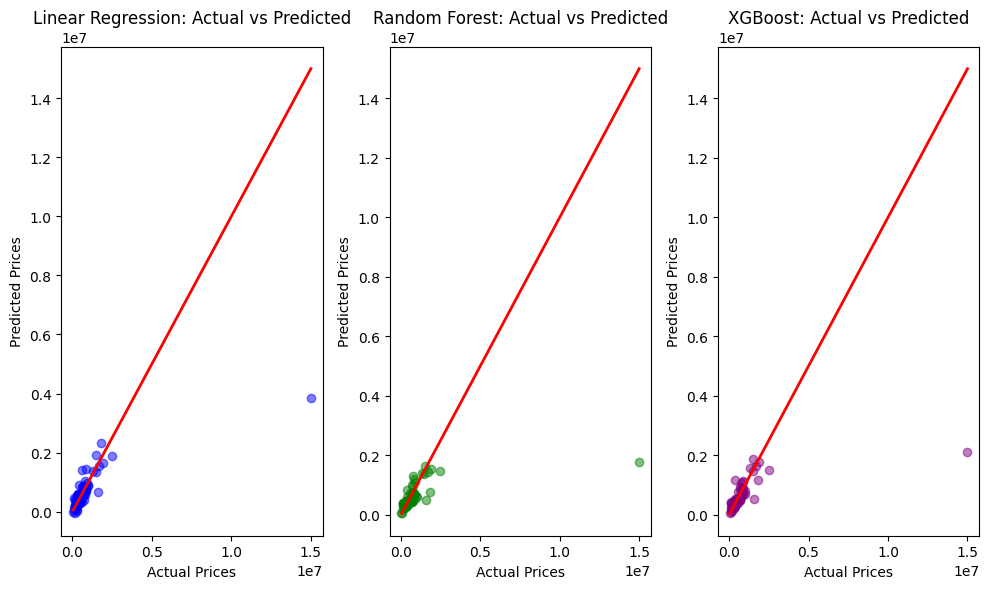

In [26]:
import matplotlib.pyplot as plt

# Linear Regression Predictions
y_pred = lr_model.predict(X_test)

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)

# XGBoost Predictions
y_pred_xg = xgb_model.predict(X_test)

# Plotting Actual vs Predicted for each model
plt.figure(figsize=(10, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xg, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()


### Discussion

Linear Regression:

The Linear Regression model shows the best performance overall with an R² score of 0.4242. This indicates that approximately 42% of the variance in the housing prices can be explained by the features used in the model. Although the RMSE of approximately 1,069,655.92 is high, the model performs better than the other models, suggesting that the linear assumption is somewhat appropriate for this dataset, despite potential nonlinear relationships between the features and target variable.

Random Forest:

The Random Forest model has the highest RMSE (1,265,105.21) and the lowest R² score (0.1946), suggesting it does not capture the underlying patterns in the data as effectively as the other models. The relatively high MAE (246,516.71) further supports this observation, indicating that, on average, the model's predictions are off by a significant margin. Random Forest, while often a strong model for non-linear data, seems less effective here, possibly due to overfitting or not having enough relevant features.

XGBoost:

 The XGBoost model yields slightly better results than Random Forest with an R² score of 0.2408 and RMSE of 1,228,287.41. While it performs better than Random Forest, it is still outperformed by Linear Regression. XGBoost's ability to handle non-linearity and interactions between features does help improve performance, but it still falls short in terms of prediction accuracy. The MAE (229,409.56) indicates that the model provides predictions that are reasonably close to the actual values, but there is still room for improvement.

Model Comparison:

Linear Regression outperforms both Random Forest and XGBoost in terms of R² score, suggesting that a simple linear relationship is more suitable for this particular dataset. Despite its higher RMSE, the Linear Regression model provides the most interpretable results. On the other hand, both Random Forest and XGBoost show lower R² scores, indicating that they fail to capture the relationship between the features and the target variable effectively in this case.

Model Performance Visuals:

The plots display the predicted vs. actual values for each model. For Linear Regression, the scatter plot shows a reasonably tight fit along the diagonal line, indicating that the predictions are somewhat close to the actual values. For Random Forest and XGBoost, the plots exhibit more spread, suggesting higher variance and less accurate predictions.

### Conclusion


In this project, I used three machine learning models—Linear Regression, Random Forest, and XGBoost—to predict housing prices in Arizona based on a set of features. After cleaning the dataset and preparing it for modeling, I trained the models and evaluated their performance using key regression metrics such as RMSE, R², and MAE.

Linear Regression performed the best, with the lowest RMSE and the highest R² score, indicating that it provided the most reliable predictions. Although its RMSE value was still high, it outperformed the other models in terms of capturing the variance in the data. The Random Forest model, despite being more complex, did not perform well in this case, as it had higher RMSE and MAE values, indicating that it struggled to capture the underlying patterns in the data. XGBoost showed potential but did not outperform Linear Regression, though it might achieve better results with further tuning and optimization.

These results suggest that for this particular dataset, a simpler model like Linear Regression is more effective than more complex models like Random Forest and XGBoost. However, with more feature engineering, hyperparameter tuning, and additional data, both Random Forest and XGBoost could be fine-tuned to achieve better performance.

Future work could involve exploring more sophisticated feature engineering techniques, using additional data, or employing regularization methods to improve model accuracy. The comparison between these models highlights the importance of understanding both the strengths and weaknesses of each approach before applying them to real-world problems.


### References

Scikit-learn Documentation. (n.d.). Linear Regression. Retrieved from https://scikit-learn.org/stable/modules/linear_model.html#linear-regression

Random Forest Regressor. (n.d.). Scikit-learn Documentation. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

XGBoost Documentation. (n.d.). XGBoost: A Scalable, Portable, and Distributed Gradient Boosting Library. Retrieved from https://xgboost.readthedocs.io/en/latest/

Kaggle. (2021). Arizona Housing Dataset 2021. Retrieved from https://www.kaggle.com/datasets/antoniong203/arizona-houses-2021

Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Retrieved from https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf